# Datojen haku ja esikäsittely

In [1]:
from set_path import set_path
mainpath, path = set_path('areadata')

In [2]:
from read_and_prepare_data import read_and_prepare_data
stat, post, kunta_stat, vaalidata = read_and_prepare_data(path)

read_and_prepare_data  read from start
read_post_muncipalities  read from file
read_stats_postcode  read from file
read_ravintolat_ja_kaupat  read from file
read_kiinteisto  read from file
read_vaalit  read from file


In [3]:
from selected_cols import selected_cols
numeric_features, categorical_features = selected_cols(largeset=False, parties=True)

In [4]:
from sklearn.feature_selection import  mutual_info_classif
import pandas as pd

from draw_and_create_clusters import create_kmeans_clusters 

from prepare_and_scale_data import prepare_and_scale_data
from create_prediction import select_kbest
from select_columns_and_clean_data import select_columns_and_clean_data
from draw_all import draw_features

from draw_and_create_clusters import draw_clusters, draw_pca, drawTSNE,  display_scree_plot, display_circles, display_parallel_coordinates_centroids, display_factorial_planes

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_colwidth = 100


#valitaan käsittelyyn tuleva alue 91 = Helsinki
selected = stat[(stat['muncipality_code']==91) | (stat['muncipality_code']==92) | (stat['muncipality_code']==49) | (stat['muncipality_code']==235)].copy()
selected_vaalidata = vaalidata[(vaalidata['Kuntanumero']==91) | (vaalidata['Kuntanumero']==92) | (vaalidata['Kuntanumero']==49) | (vaalidata['Kuntanumero']==235) ].copy()
post_included = post[(post['muncipality_code']==91) | (post['muncipality_code']==92) | (post['muncipality_code']==49) | (post['muncipality_code']==235)]['postcode'].copy()

#valitaan käsittelyyn tuleva alue FI1B1 = Uusimaa
selected = stat[stat['area_code']=='FI1B1'].copy()
selected_vaalidata = vaalidata[vaalidata['area_code']=='FI1B1'].copy()
post_included = post[post['area_code']=='FI1B1'].copy()


selected = stat.copy()
selected_vaalidata = vaalidata.copy()
post_included = post.copy()
n_clusters = 6

n_components = 2
n_clusters = 6
axis_ranks=  [(0,1)]
alpha = 0.8

from prepare_and_scale_data import prepare_and_scale_data

data, X, X_scale = prepare_and_scale_data(selected, pd.DataFrame(), numeric_features, categorical_features)


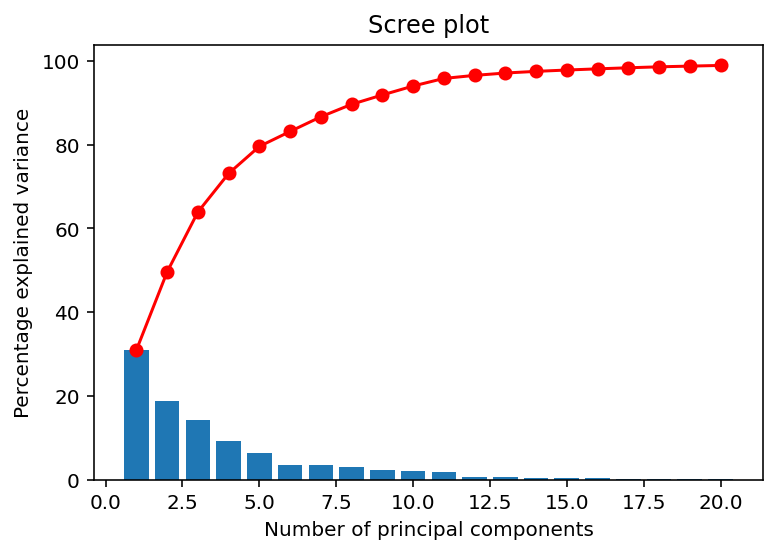

In [5]:
display_scree_plot(X_scale, n_components = 20)

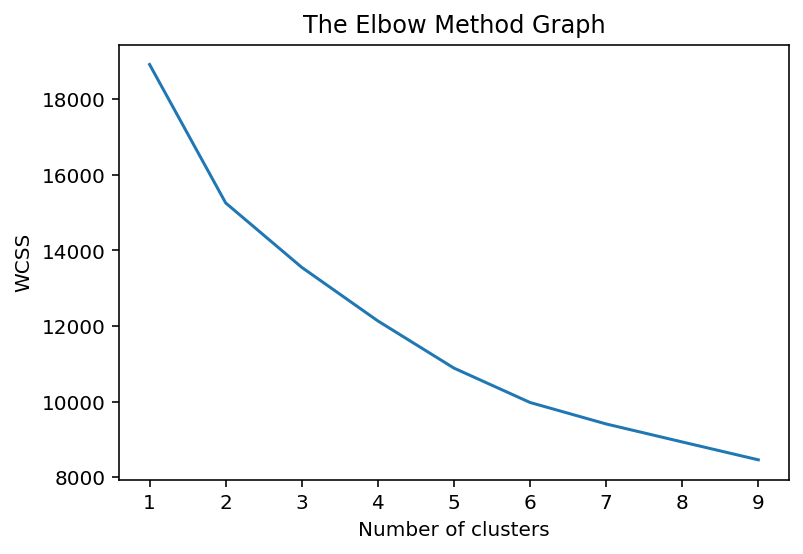

In [6]:
range_end = 10
draw_clusters(X_scale, range_end=range_end)

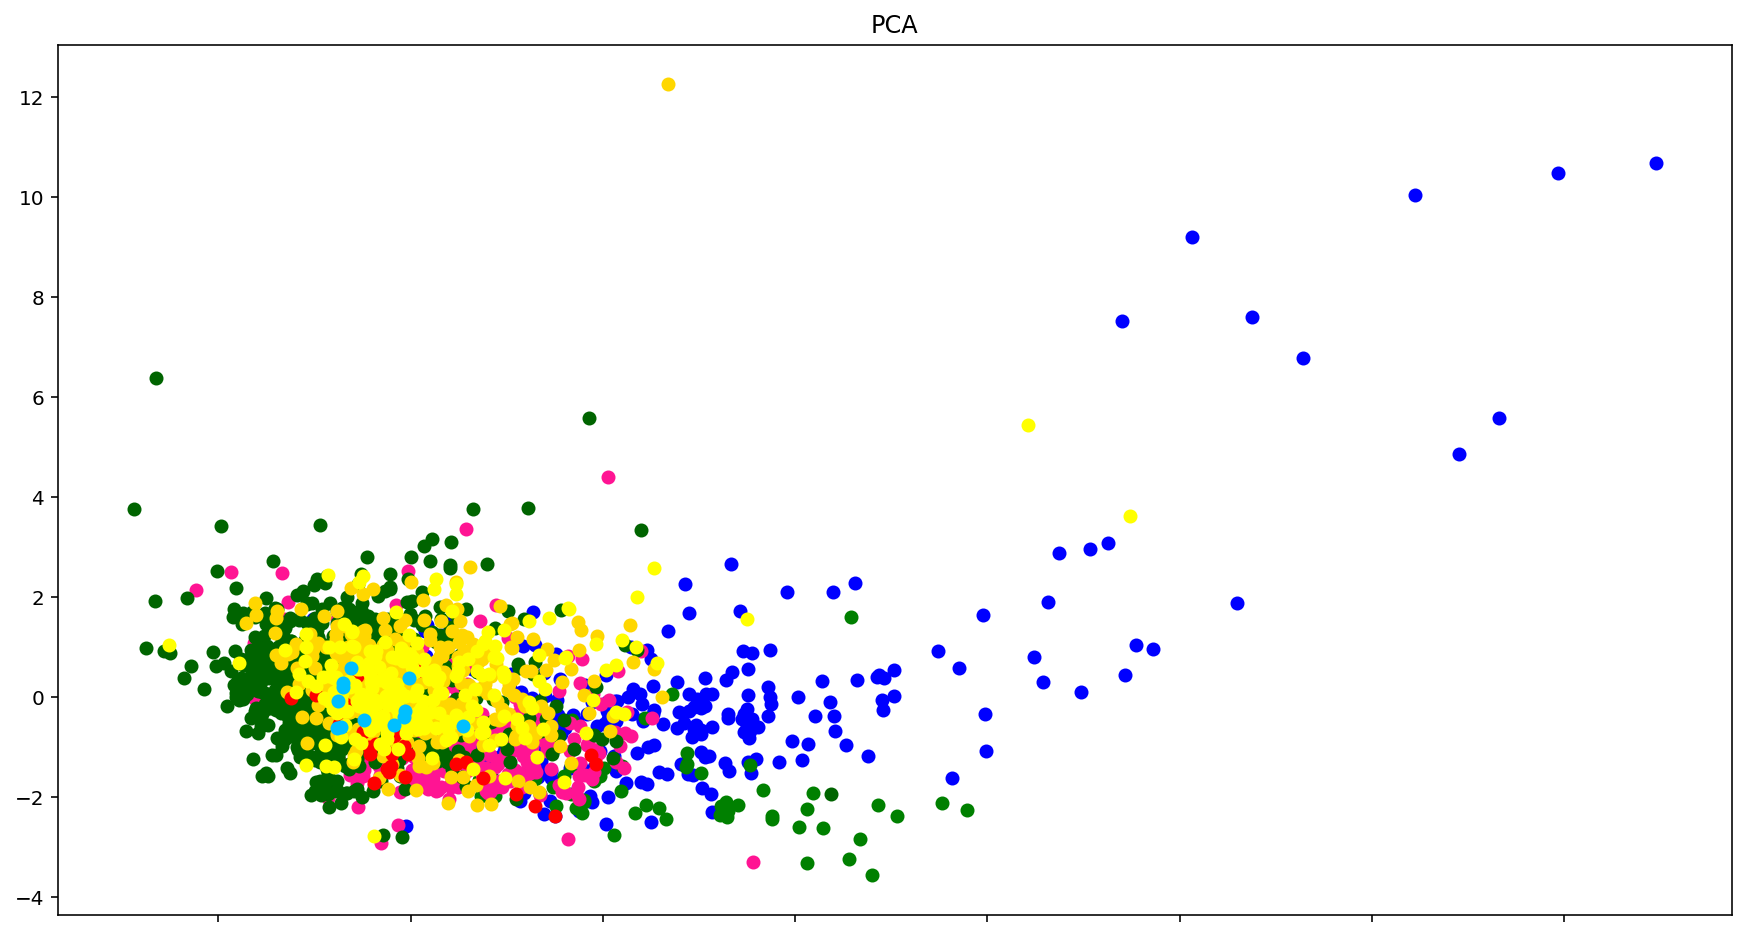

In [7]:
n_components = 2
draw_pca(X_scale, data, n_components = n_components, compare=True)

Perplexity=30 in 181 sec
Perplexity=50 in 179 sec
Perplexity=70 in 143 sec
Perplexity=100 in 164 sec


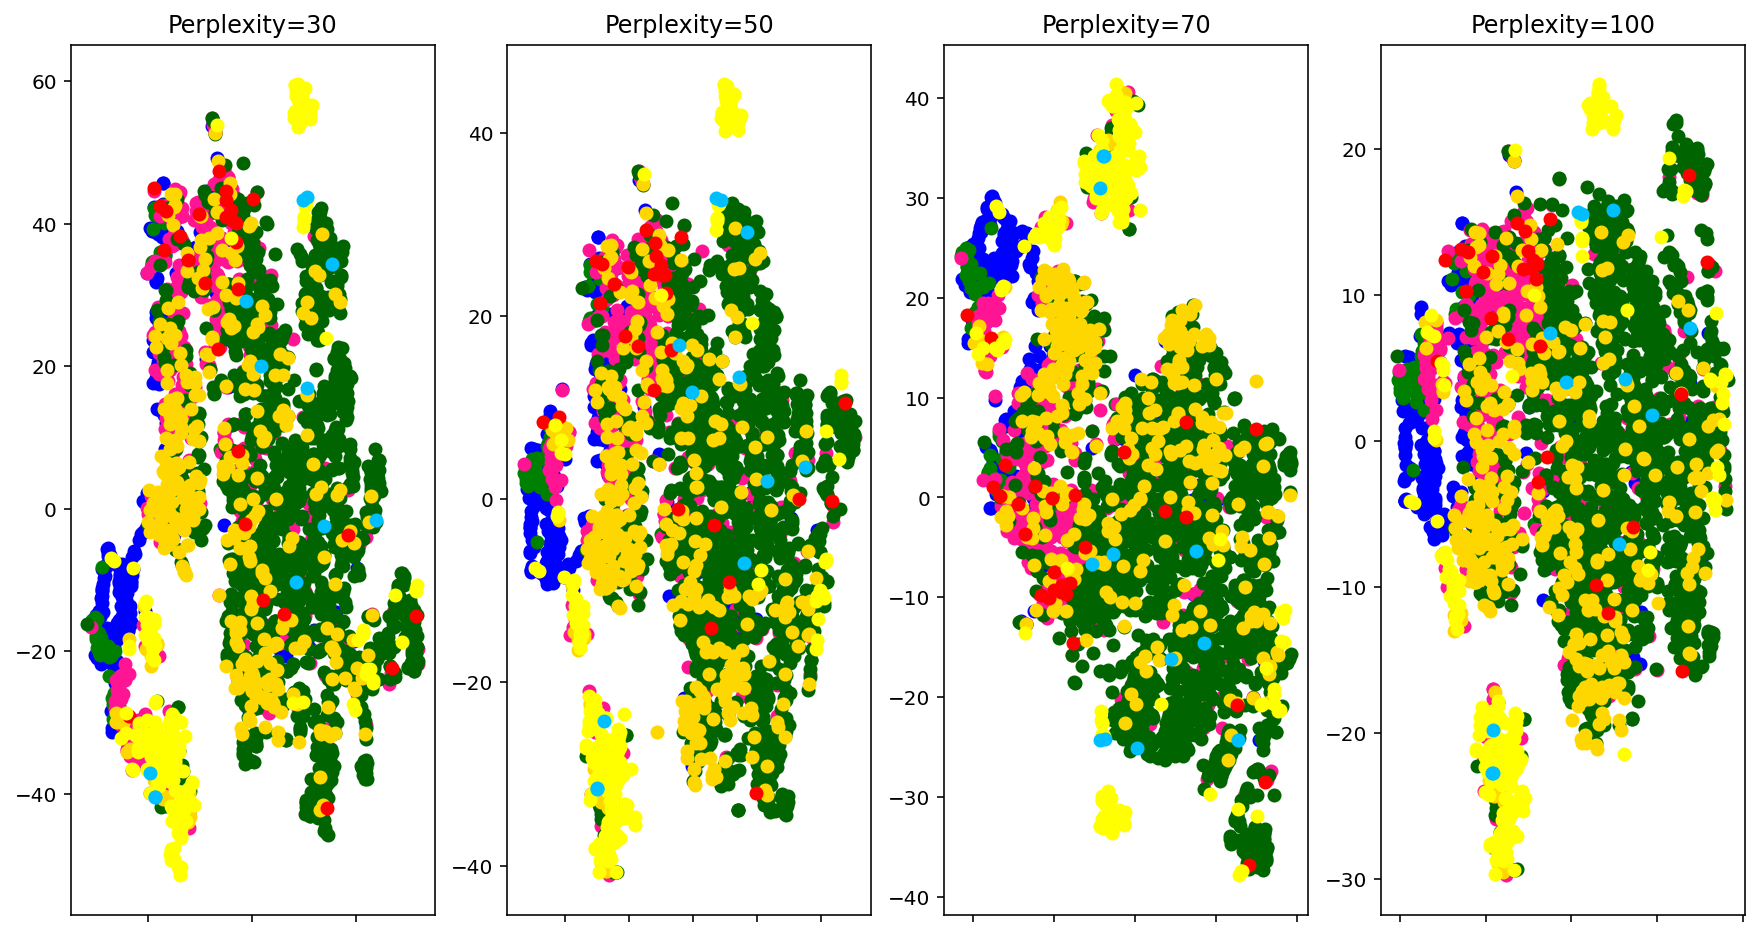

In [8]:
drawTSNE(X_scale, data, n_components = n_components, compare=True)

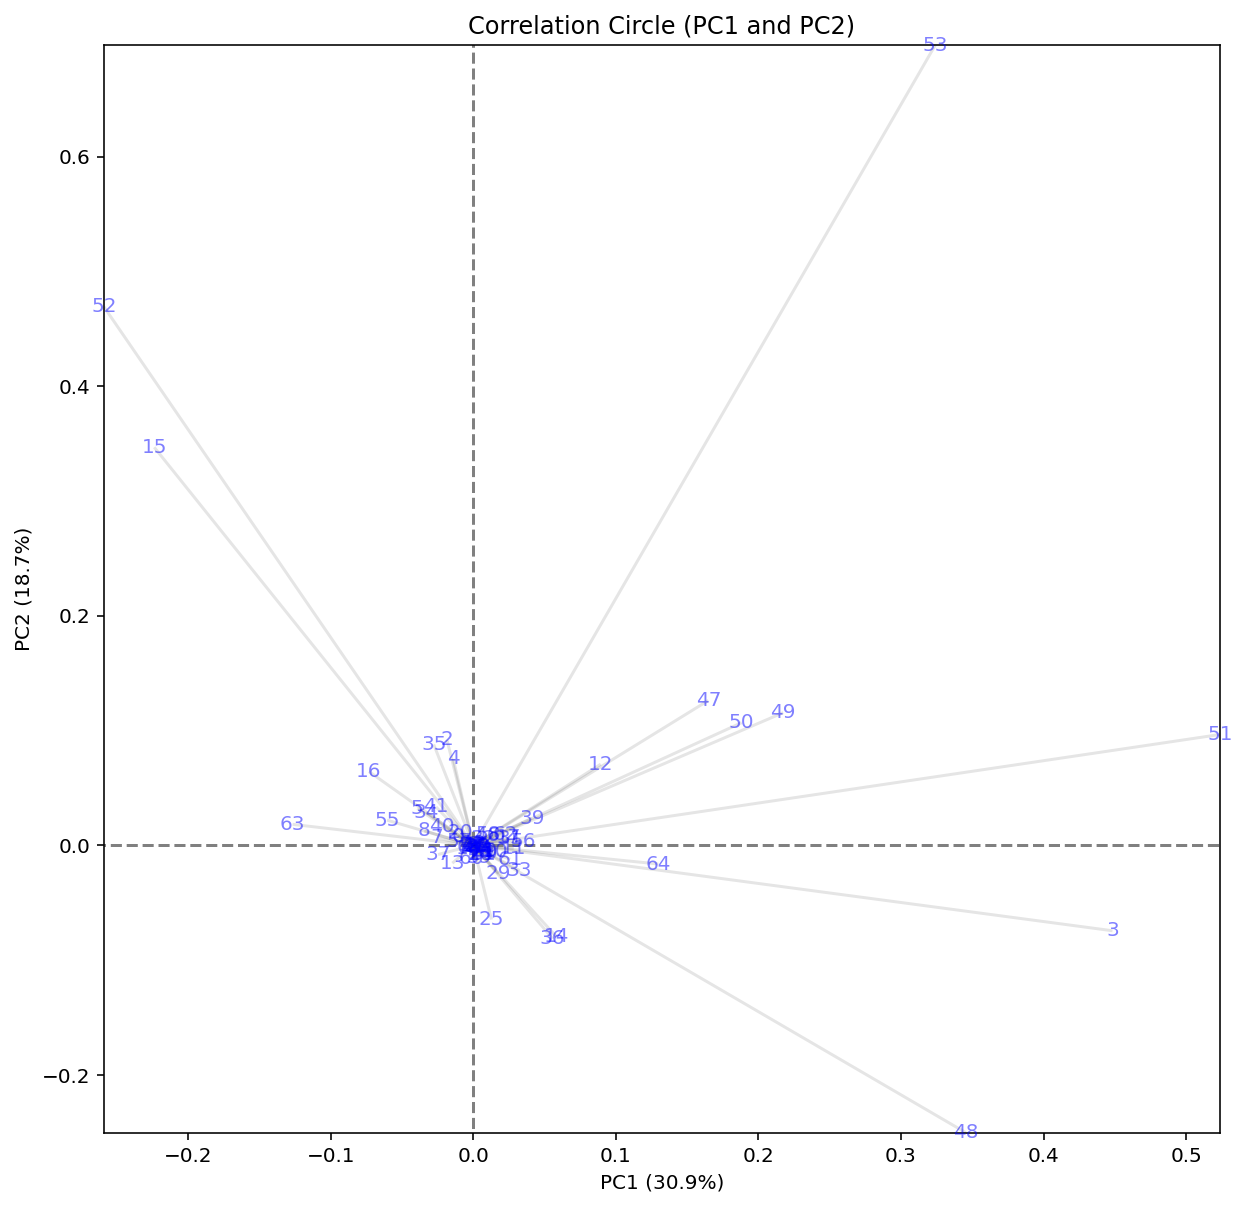

In [9]:
axis_ranks =  [(0,1)]
n_components = 2
labels = [X.columns.get_loc(c) for c in X.columns]

pcs = display_circles(X_scale, n_components=n_components, axis_ranks=axis_ranks, labels=labels, label_rotation=0, lims=None)

In [10]:
for c in X.columns:
    print(X.columns.get_loc(c), c)

0 Miehet, 2018 (HE) osuudesta asukkaat
1 Naiset, 2018 (HE) osuudesta asukkaat
2 Asuntojen keskipinta-ala, 2018 (RA) osuus total
3 Talotyypit yhteensä 2019 Neliöhinta (EUR/m2) osuus total
4 Asumisväljyys, 2018 (TE) osuus total
5 Asukkaiden keski-ikä, 2018 (HE) osuus total
6 Postinumeroalueen pinta-ala osuus area_code
7 Perusasteen suorittaneet, 2018 (KO) osuudesta asukkaat
8 Ammatillisen tutkinnon suorittaneet, 2018 (KO) osuudesta asukkaat
9 Ylioppilastutkinnon suorittaneet, 2018 (KO) osuudesta asukkaat
10 Alemman korkeakoulututkinnon suorittaneet, 2018 (KO) osuudesta asukkaat
11 Ylemmän korkeakoulututkinnon suorittaneet, 2018 (KO) osuudesta asukkaat
12 Asukkaiden ostovoimakertymä, 2017 (HR) osuudesta asukkaat osuus total
13 Asunnot, 2018 (RA) osuudesta asukkaat
14 Kerrostaloasunnot, 2018 (RA) osuudesta asukkaat
15 Kesämökit yhteensä, 2018 (RA) osuudesta asukkaat
16 Pientaloasunnot, 2018 (RA) osuudesta asukkaat
17 Työlliset, 2017 (PT) osuudesta asukkaat
18 Työttömät, 2017 (PT) osuudesta